In [44]:
import warnings
import sys
import os

warnings.filterwarnings('ignore')
os.environ["CUDA_VISIBLE_DEVICES"] = ''
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.95'
os.environ['JAX_PLATFORMS'] = 'cpu'
sys.path.append('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/')

import jax.numpy as jnp
import pandas as pd
from utils import parse_run, read_meta_data, df_threshold_residuals
import matplotlib.pyplot as plt

In [2]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
dir_name32_64 = 'div_k_grad_full_dataset'
div_k_grad32_64 = pd.read_csv(os.path.join(path, dir_name32_64, 'meta_data.csv'), index_col=0)

dir_name128 = 'div_k_grad05_128_full_dataset'
div_k_grad128 = pd.read_csv(os.path.join(path, dir_name128, 'meta_data.csv'), index_col=0)

run_name_32 = 'mn70w2'
run_name_64 = 'xjfmrp'
run_name_128 = 'yfbetl'

run_32 = jnp.load(os.path.join(path, dir_name32_64, run_name_32+'.npz'))
run_64 = jnp.load(os.path.join(path, dir_name32_64, run_name_64+'.npz'))
run_128 = jnp.load(os.path.join(path, dir_name128, run_name_128+'.npz'))

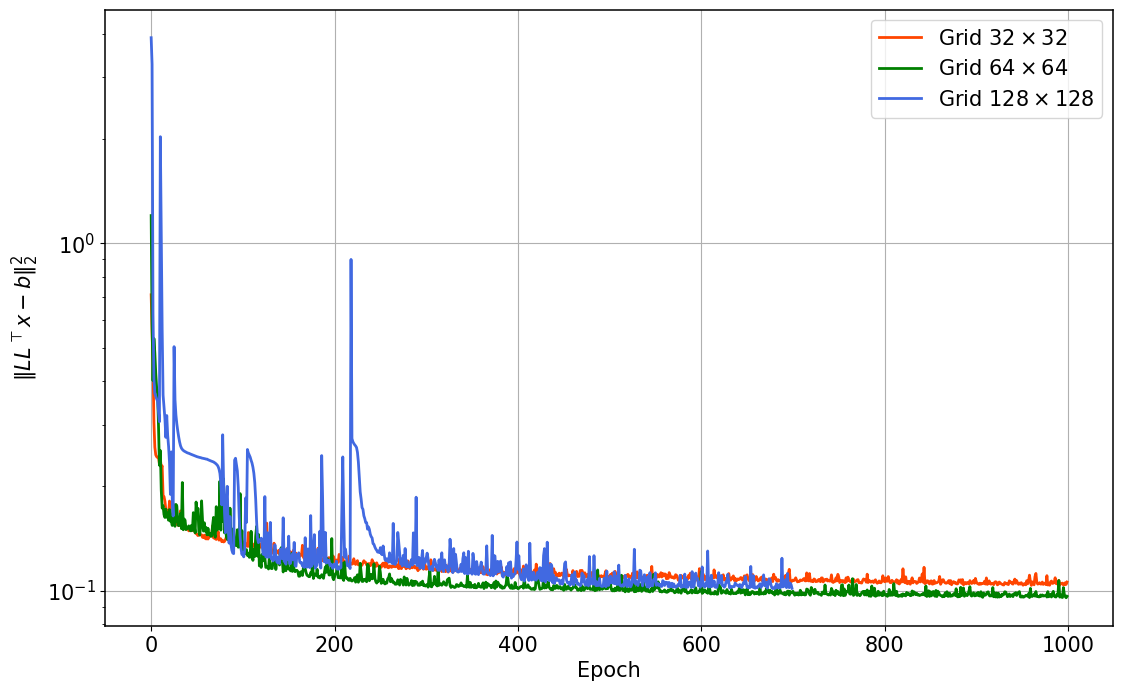

In [41]:
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['font.size'] = 15
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.1#0.8
plt.set_cmap('jet')
# _, axes = plt.subplots(1, 2, figsize=(11, 7))
plt.plot(range(len(run_32['losses'][0])), run_32['losses'][1] / (32**2), label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='orangered')
plt.plot(range(len(run_64['losses'][0])), run_64['losses'][1] / (64**2), label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
plt.plot(range(len(run_128['losses'][0])), run_128['losses'][1] / (128**2), label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel(r'$\Vert LL^\top x - b \Vert_2^2$');
# axes[1].plot(range(len(run_32['res_I'])), run_32['res_I'], label="CG")

In [ ]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
    pd.set_option('display.max_columns', 500)
    
    df = pd.read_csv(os.path.join(path, dir_name, 'meta_data.csv'), index_col=0)
    axes_num = 3 if with_cond else 2
    _, axes = plt.subplots(len(run_name), axes_num, figsize=figsize)
    if len(run_name) == 1:
        axes = np.expand_dims(axes, 0)
    
    for i, n in enumerate(run_name):
        file = os.path.join(path, dir_name, n+'.npz')
        run = jnp.load(file)
        axes[i, 0].plot(range(len(run['losses'][0])), run['losses'][1], label='Test')
        axes[i, 0].plot(range(len(run['losses'][0])), run['losses'][0], label='Train')
        axes[i, 0].legend()
        axes[i, 0].set_yscale('log')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].grid()
        axes[i, 0].set_title(n)
        
        axes[i, -1].plot(range(len(run['res_I'])), run['res_I'], label="CG")
        axes[i, -1].plot(range(len(run['res_LLT'])), run['res_LLT'], label="PCG")
        axes[i, -1].legend()
        axes[i, -1].set_yscale('log')
        axes[i, -1].set_xlabel('Iteration')
        axes[i, -1].set_ylabel('$\|res\|$')
        axes[i, -1].grid()

In [19]:
folder = 'full_dataset_f64'
df = read_meta_data(folder)

In [20]:
print(df.shape)
df#.head()

(36, 28)


,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg,precision
a71g6l,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,58.449305,58.581961,1.0,26.739440,-0.163216,94.0,117.0,135.0,151.0,21.0,28.0,35.0,41.0,26.784428,1294.722494,35.878988,f64
7npweh,poisson,32.0,0.5,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,58.623474,58.613883,1.0,26.739440,-0.158215,94.0,117.0,135.0,151.0,21.0,28.0,35.0,42.0,26.112120,1290.287685,33.801677,f64
8bh776,poisson,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,58.582818,58.608891,1.0,26.739440,-0.162196,94.0,117.0,135.0,151.0,21.0,28.0,35.0,42.0,28.025106,1290.362383,33.853193,f64
owz44h,div_k_grad,32.0,0.1,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,72.799470,74.308232,1.0,27.825211,-0.107998,129.0,168.0,199.0,228.0,22.0,29.0,36.0,42.0,26.786243,1292.468620,33.758369,f64
5wybgq,div_k_grad,32.0,0.5,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,104.635478,105.926954,1.0,28.537053,-0.072184,191.0,247.0,296.0,340.0,25.0,33.0,41.0,48.0,27.155146,1293.345890,33.013687,f64
507ps1,div_k_grad,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,400.0,129.428081,128.905875,1.0,30.632630,-0.058281,233.0,305.0,371.0,NaN,27.0,36.0,44.0,52.0,25.418882,1291.829176,33.518710,f64
h4rwjy,poisson,32.0,0.1,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,12.142962,12.044978,1.0,26.739440,-0.088483,94.0,117.0,135.0,151.0,16.0,21.0,26.0,31.0,55.402498,1823.213423,41.882236,f64
mpxgog,poisson,32.0,0.5,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,11.976269,11.889025,1.0,26.739440,-0.092618,94.0,117.0,135.0,151.0,16.0,21.0,26.0,31.0,53.764221,1819.568438,39.025788,f64
owbe72,poisson,32.0,0.7,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,12.140964,12.090656,1.0,26.739440,-0.088928,94.0,117.0,135.0,151.0,16.0,21.0,26.0,31.0,50.607648,1818.313632,38.921062,f64
dfzqvv,div_k_grad,32.0,0.1,1000.0,200.0,l_ict,8.0,1000.0,0.001,None,400.0,18.769063,18.896185,1.0,27.825211,-0.072575,129.0,168.0,199.0,228.0,16.0,21.0,26.0,31.0,52.055555,1818.909704,38.983679,f64


In [14]:
df.columns

Index(['pde', 'grid', 'variance', 'N_samples_train', 'N_samples_test',
       'lhs_type', 'batch_size', 'epoch_num', 'lr_start', 'schedule_params',
       'cg_valid_repeats', 'train_loss_last', 'test_loss_last',
       'cond_prec_system', 'cond_initial_system', 'alpha', 'cg_1e_3',
       'cg_1e_6', 'cg_1e_9', 'cg_1e_12', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9',
       'pcg_1e_12', 'time_data', 'time_train', 'time_pcg', 'precision',
       'prec_inverse', 'loss_type'],
      dtype='object')

In [33]:
q = "pde == 'div_k_grad' and lhs_type == 'l_ict' and variance == 0.7"
check = df.query(q).index
print(check.shape)
df.query(q).loc[:, ['alpha', 'lhs_type', 'pde', 'grid', 'variance', 'batch_size', 'epoch_num', 'lr_start', 'train_loss_last', 'test_loss_last', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9', 'pcg_1e_12']]
# df.query(q).loc[:, ['lhs_type']]

(3,)


,alpha,lhs_type,pde,grid,variance,batch_size,epoch_num,lr_start,train_loss_last,test_loss_last,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12
wgchpc,-0.030033,l_ict,div_k_grad,32.0,0.7,8.0,1000.0,0.001,41.281669,42.277595,19.0,24.0,30.0,35.0
4qvbdd,-0.043936,l_ict,div_k_grad,64.0,0.7,8.0,1000.0,0.001,183.796049,165.828915,30.0,39.0,48.0,57.0
ws00g3,-0.035494,l_ict,div_k_grad,128.0,0.7,8.0,700.0,0.001,758.456307,687.068748,53.0,67.0,81.0,95.0


,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg,precision,prec_inverse,loss_type
5qr9w4,poisson,32,0.1,1000,200,l_ilu0,8,500,0.001,None,120,NaN,NaN,1,26.73944,NaN,94,117,NaN,NaN,NaN,NaN,NaN,NaN,24.216984,24900.746545,0.839355,f64,True,log_kaporin
9f3vix,poisson,32,0.1,1000,200,l_ilu0,8,500,0.001,None,120,NaN,NaN,1,26.73944,NaN,94,117,NaN,NaN,NaN,NaN,NaN,NaN,15.348599,24896.422747,12.286403,f64,False,log_kaporin
ltn5yh,poisson,32,0.1,1000,200,l_ilu0,8,500,0.001,None,120,0.001312,0.001263,1,26.73944,-0.022944,94,117,NaN,NaN,NaN,NaN,NaN,NaN,18.315614,25392.896381,0.516919,f64,True,spai_P_hutch


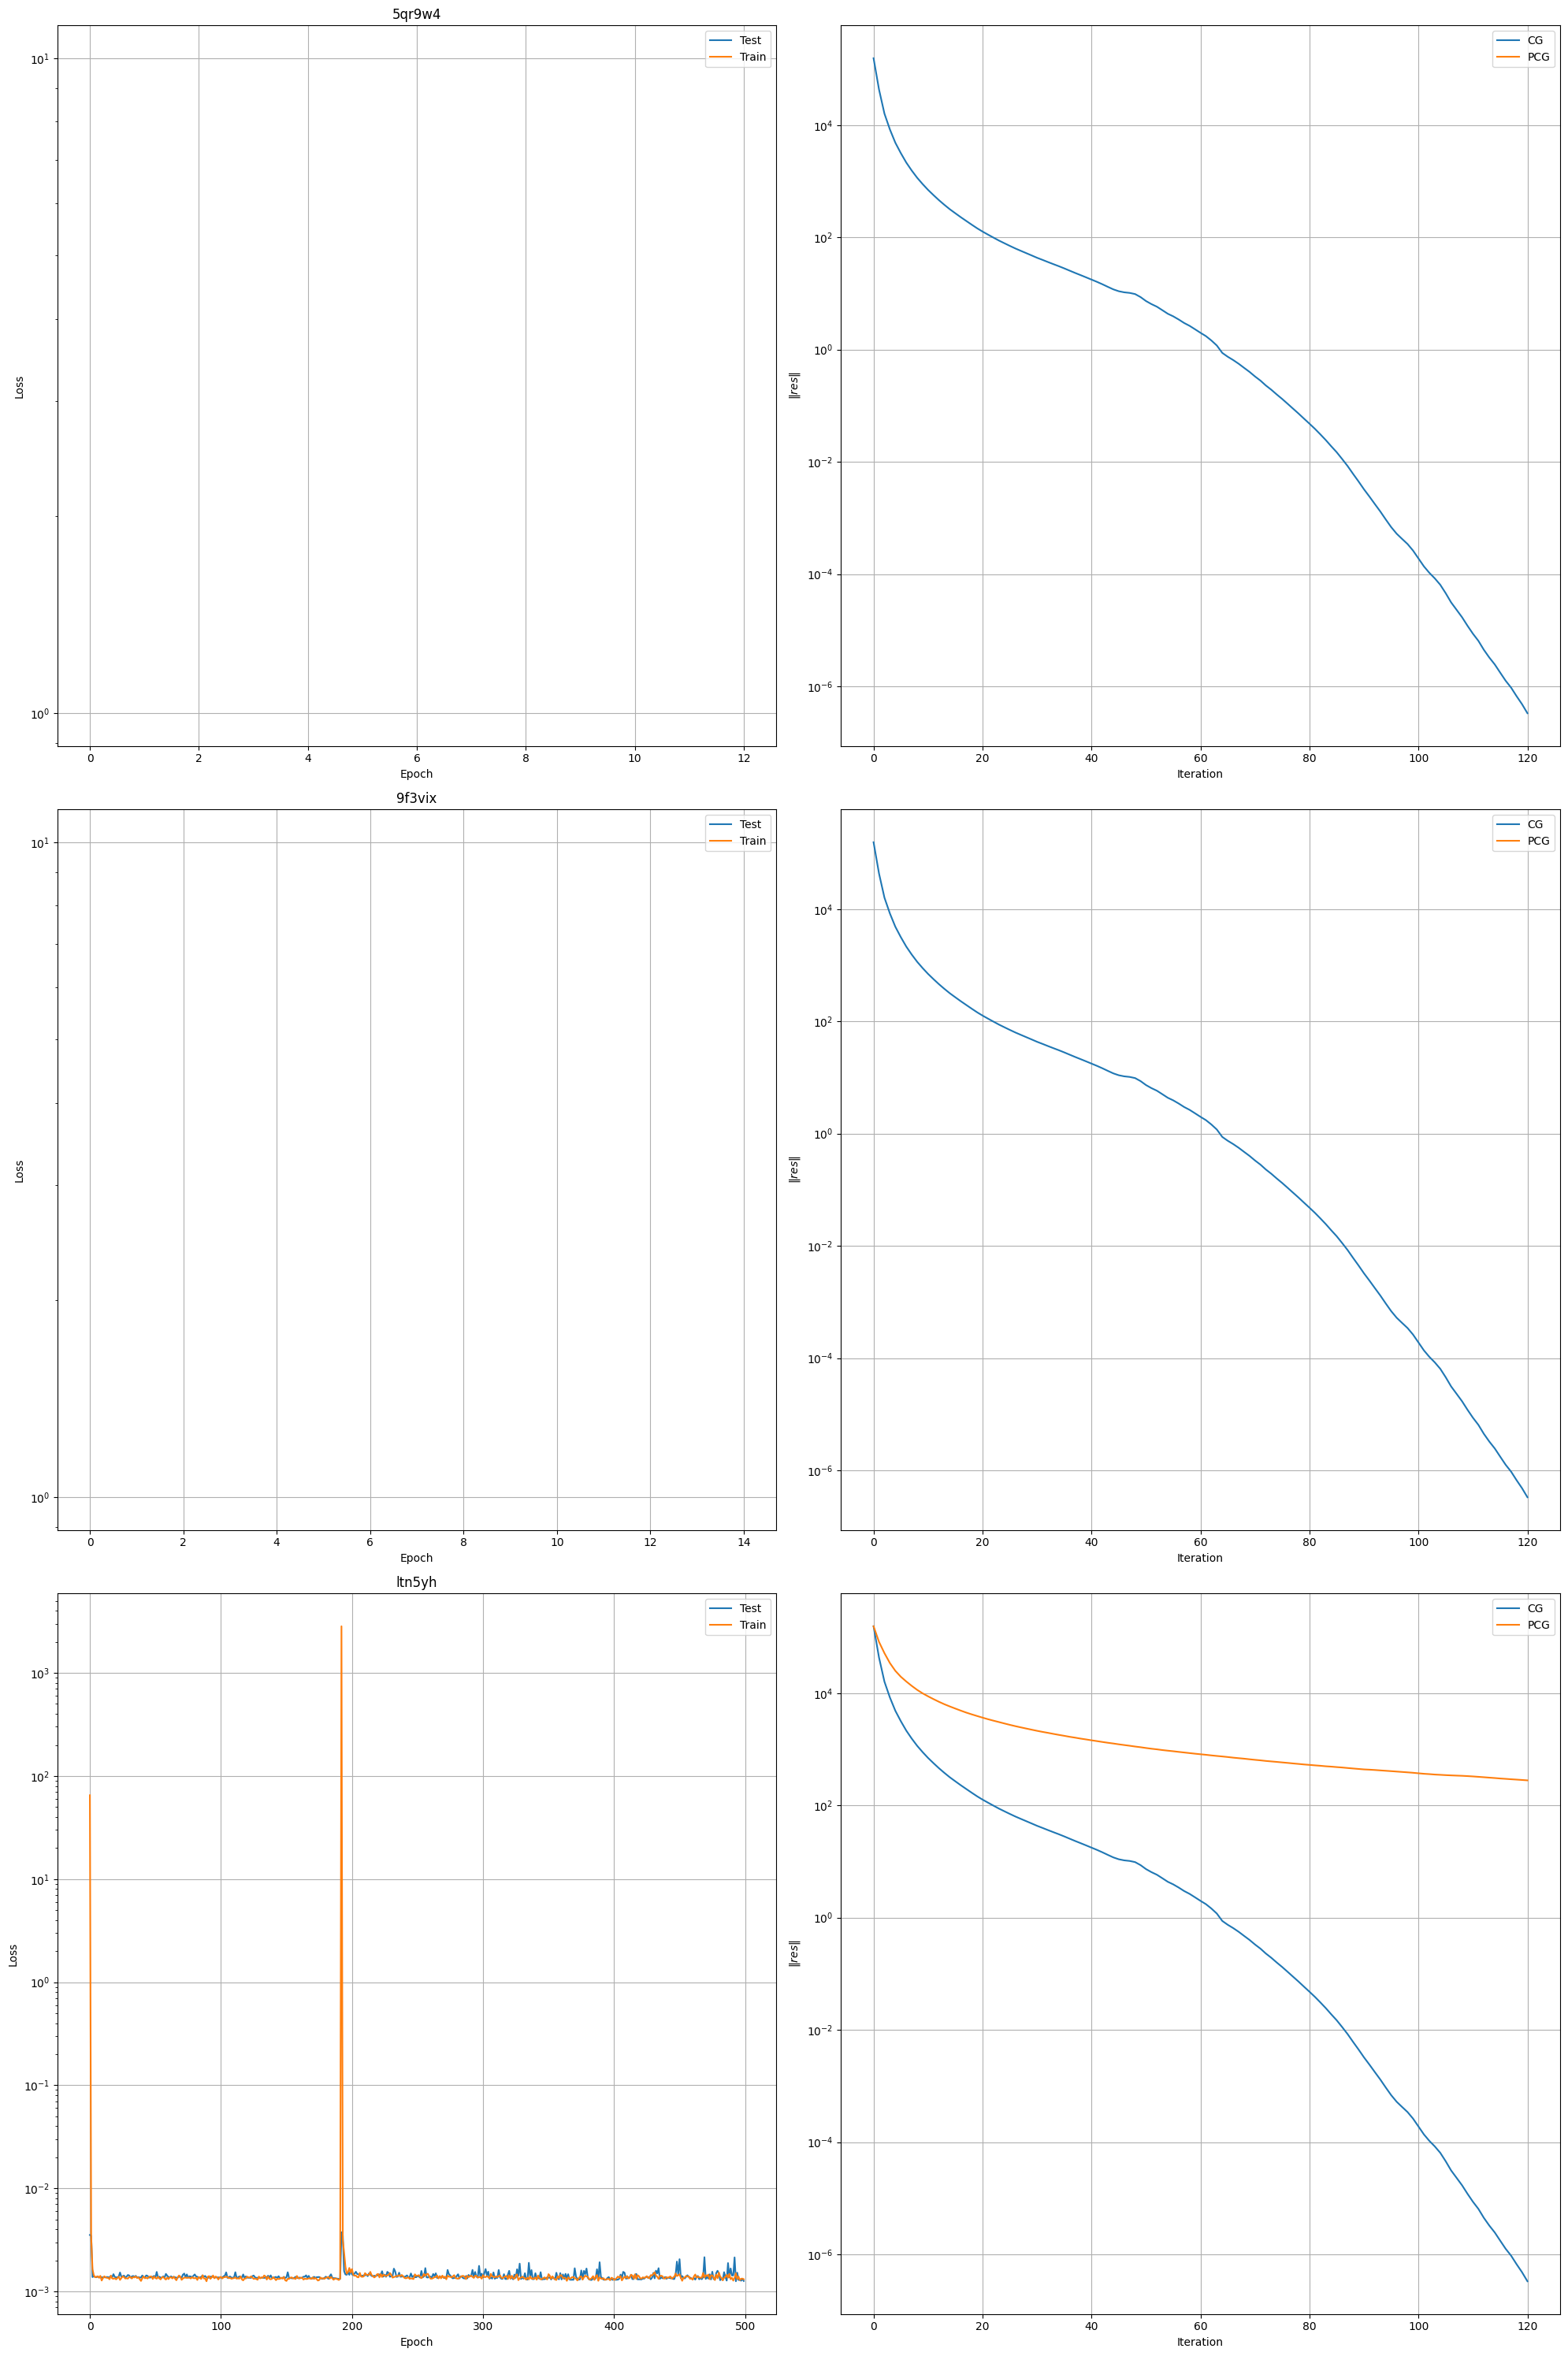

In [16]:
parse_run(folder, check, (20, 30), with_cond=False) # Second argument may be a list of idnex or 'check'

In [ ]:
# If not stated oppositge, each has following parameters:
# batch_size = 8, epoch_num = 1000, lr_start = 1e-3


names_01_32 = [
    'rsk886',    # batch_size = 16
    '5rafli'     # lr_start = 5e-4
]
names_01_64 = [
    'or87fe',
    '0y3wn9'
]
names_01_128 = [
    'oazezw',    # batch_size = 16, epoch_num = 700, lr_start = 1e-3
    'id5mjh'     # batch_size = 8,  epoch_num = 700, lr_start = 5e-4
]

names_05_32 = [
    'mn70w2',
    '7t25m5'
]
names_05_64 = [
    'xjfmrp',
    '12hp5x'
]
names_05_128 = [
    'yfbetl',    # batch_size = 16, epoch_num = 700, lr_start = 1e-3
    '3rpxrp'     # batch_size = 8,  epoch_num = 700, lr_start = 1e-3
]

names_07_32 = [
    'frf0bv',
    'usmx5e'
]
names_07_64 = [
    'mlavvm',
    'f3a9le'
]
names_07_128 = [
    '87jxom',    # batch_size = 8,  epoch_num = 700, lr_start = 1e-3
    'zfah2u'     # batch_size = 8,  epoch_num = 700, lr_start = 1e-3
]

poisson_32 = [
    '3s6zpm',     # batch_size = 8,   epoch_num = 400, lr_start = 1e-3
    'm055x0'      # batch_size = 32,  epoch_num = 400, lr_start = 1e-3
]
poisson_64 = [
    'rl8gh2',     # batch_size = 8,  epoch_num = 400, lr_start = 1e-3
    '8m5t3u'      # batch_size = 8,  epoch_num = 400, lr_start = 5e-4
]
poisson_128 = [
    '5j3ctz',     # batch_size = 16,  epoch_num = 400, lr_start = 1e-3
    'k5pndz'      # batch_size = 8,   epoch_num = 400, lr_start = 1e-3
]

In [96]:
# folder = 'spai_kaporin_corrector_net'
folder = 'spai_kaporin'
# folder = 'full_dataset_f64'
df = read_meta_data(folder)
print(df.shape)
df.index

(33, 30)


Index(['5qr9w4', '9f3vix', 'ltn5yh', 'npke4x', 'g1kdhp', 'cn43fz', 'gekq4d',
       'os6r7k', 'p8qdeo', 'xk24bw', 'ngy7dg', '9z4kqm', 'a2a3jg', '2lkl6e',
       '99njt4', 'jkpei2', 'tbld02', 'd2f8bs', 'qfm0k3', 'rp9dc1', '7y4mda',
       'vg8dpn', 'eqvnns', 'xli595', 'v60ncv', '49iqgg', 'vixktm', '6ywbxq',
       'xsgius', '6t4pyw', '3tvqfq', 'f1060s', '5ukezj'],
      dtype='object')

In [97]:
check = df.index

# q = "loss_type == 'log_kaporin'"
# check = df.query(q).index

# print(check.shape)
# df.query(q).loc[:, ['alpha', 'lhs_type', 'pde', 'grid', 'variance', 'batch_size', 'epoch_num', 'lr_start', 'train_loss_last', 'test_loss_last', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9', 'pcg_1e_12']]
# df.query(q).loc[:, ['lhs_type']]

,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg,precision,prec_inverse,loss_type
5qr9w4,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,NaN,NaN,1.0,26.73944,NaN,94.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,24.216984,24900.746545,0.839355,f64,True,log_kaporin
9f3vix,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,NaN,NaN,1.0,26.73944,NaN,94.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,15.348599,24896.422747,12.286403,f64,False,log_kaporin
ltn5yh,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,1.311947e-03,1.263031e-03,1.0,26.73944,-0.022944,94.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,18.315614,25392.896381,0.516919,f64,True,spai_P_hutch
npke4x,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,-2.097516e+03,-6.649722e+01,1.0,26.73944,-42.000000,94.0,117.0,NaN,NaN,51.0,69.0,80.0,95.0,16.130314,24760.172998,0.788898,f64,True,log_kaporin
g1kdhp,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,-2.097516e+03,-6.649722e+01,1.0,26.73944,-42.000000,94.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,15.219956,24754.545493,12.128995,f64,False,log_kaporin
cn43fz,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,1.333956e-03,1.356428e-03,1.0,26.73944,-42.000000,94.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,15.144986,25391.558679,0.504785,f64,True,spai_P_hutch
gekq4d,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,1.333956e-03,1.356428e-03,1.0,26.73944,-42.000000,94.0,117.0,NaN,NaN,24.0,33.0,41.0,48.0,15.439484,25391.982096,10.614640,f64,False,spai_P_hutch
os6r7k,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,1.943389e+10,1.946075e+10,1.0,26.73944,-42.000000,94.0,117.0,NaN,NaN,94.0,117.0,NaN,NaN,15.827709,7566.207834,0.517346,f64,True,spai_Pinv_hutch
p8qdeo,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,1.943389e+10,1.946075e+10,1.0,26.73944,-42.000000,94.0,117.0,NaN,NaN,94.0,118.0,NaN,NaN,17.444415,7566.744003,10.624974,f64,False,spai_Pinv_hutch
xk24bw,poisson,32.0,0.1,1000.0,200.0,l_ilu0,8.0,500.0,0.001,None,120.0,1.322782e-03,1.322782e-03,1.0,26.73944,-42.000000,94.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,15.177414,38469.251213,0.518268,f64,True,spai_P_direct


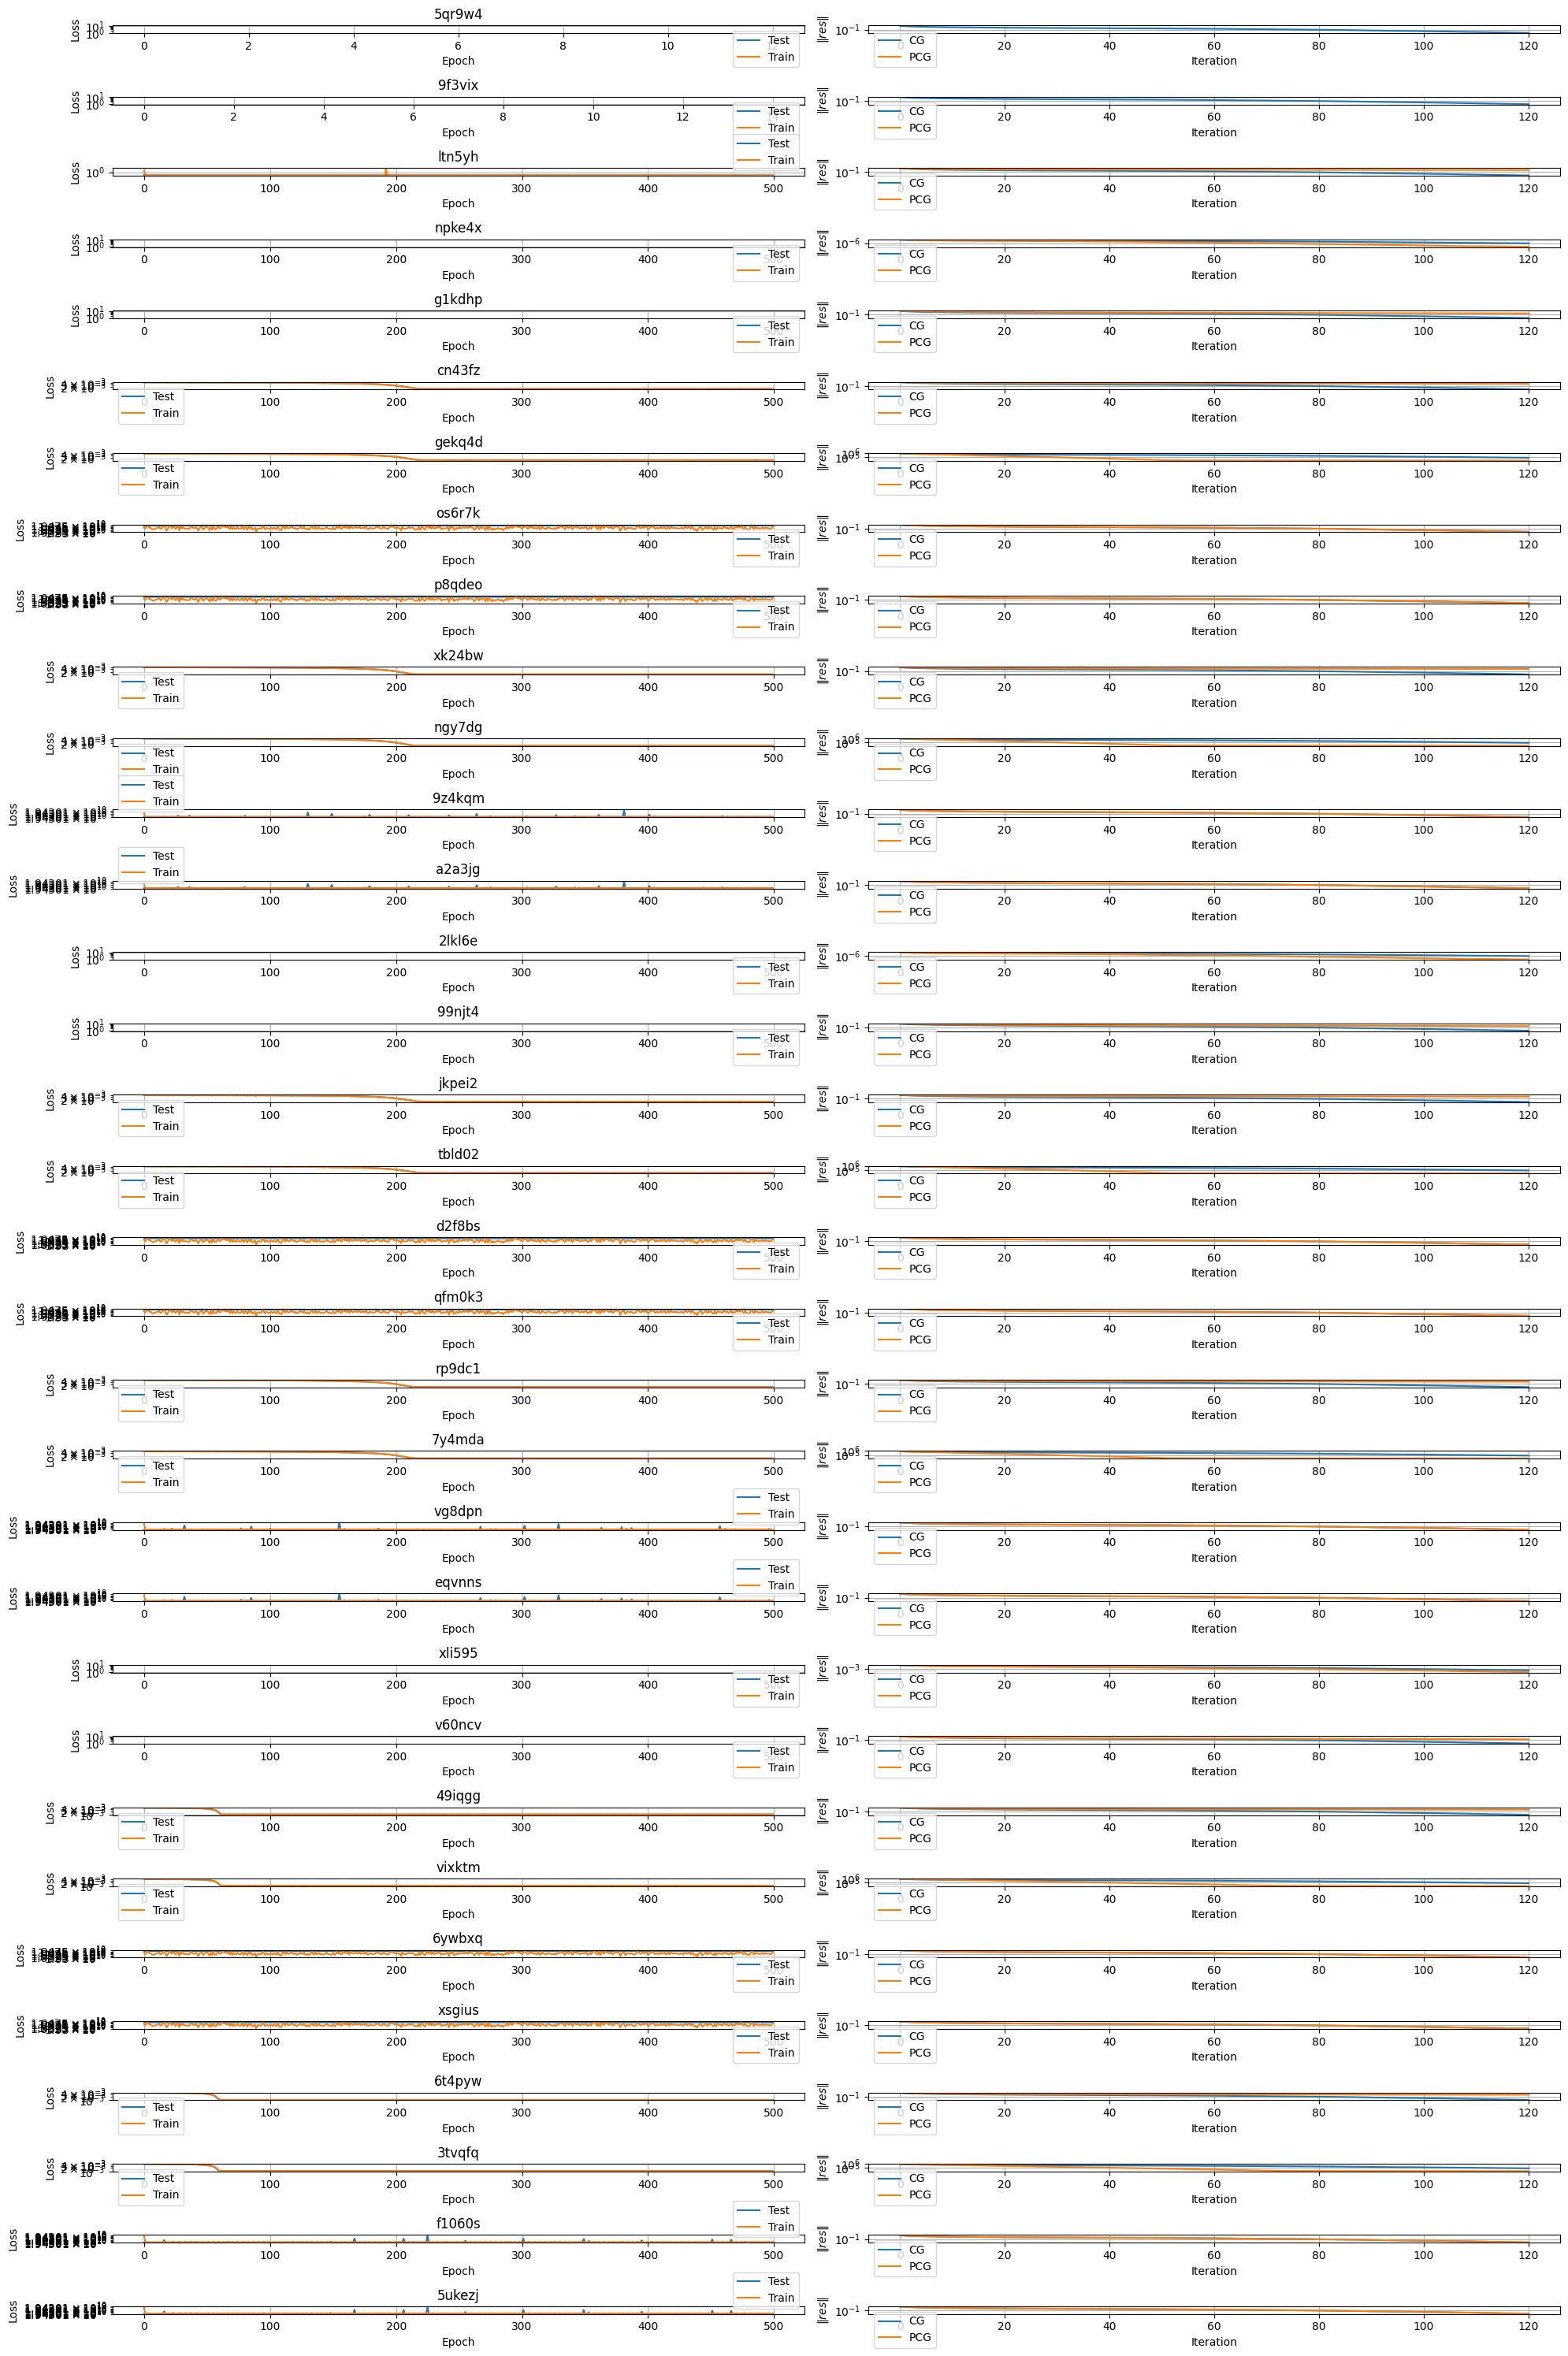

In [98]:
parse_run(folder, check, (20, 30), with_cond=False) # Second argument may be a list of idnices